# init

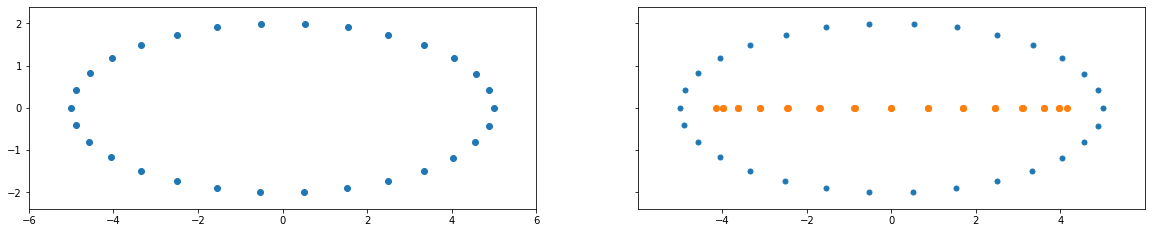

In [1]:
import sys 
sys.path.append('pyfiles/')
import classes as cl
# so we don't have to reboot kernel every time we modify classes.py
%load_ext autoreload
%autoreload 2

# math stuff
import numpy as np
# visualization
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy.spatial import distance
from copy import deepcopy

import matplotlib.pyplot as plt
%matplotlib inline
# sliders
from ipywidgets import interactive

# for matrix import and display
import pandas as pd
from IPython.display import display_html 
import csv 

######## NOTE: from this point on, order is important. 
# it would be good to make the code more robust, but right
# now, there are ordered dependencies.

points = cl.ellipse_example(numpts = 30)

[5.84, 4.7, 3.17, 1.59, 0.54, 0.62, 2.37, 6.13, 12.0, 19.65, 28.62, 37.94, 46.82, 54.2, 59.47, 61.84, 61.12, 57.59, 51.63, 43.97, 35.65, 27.42, 20.03, 14.18, 10.02, 7.55, 6.49, 6.29, 6.41, 6.38]


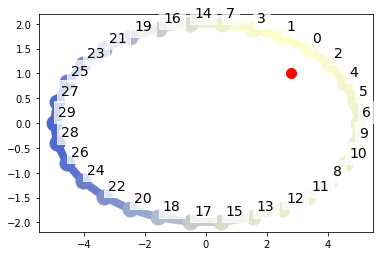

In [2]:
init_complex = cl.initcomplex(points)
s_complex = cl.complex()
s_complex.key_point = (2.8,1)

# update this to .self so don't need input, except maybe key pt
distlist = s_complex.find_sq_dist(init_complex)
cl.sort_complex(s_complex, distlist, plot = True)

# this is the permutation
all_simplices = s_complex.order_all_simps()
# I am pretty sure the simps are also ordered in s_complex, 
# not just all_simplices. make sure.
# dummy_simplex = cl.simplex()
# dummy_simplex.columnvalue = 0
# all_simplices.append(dummy_simplex)

In [3]:
print(init_complex.vertlist)

[
simplex ind 0, dim 0, bd [-1], ord ind 6, col val 12, 
simplex ind 1, dim 0, bd [-1], ord ind 5, col val 10, 
simplex ind 2, dim 0, bd [-1], ord ind 4, col val 8, 
simplex ind 3, dim 0, bd [-1], ord ind 2, col val 4, 
simplex ind 4, dim 0, bd [-1], ord ind 0, col val 1, 
simplex ind 5, dim 0, bd [-1], ord ind 1, col val 2, 
simplex ind 6, dim 0, bd [-1], ord ind 3, col val 6, 
simplex ind 7, dim 0, bd [-1], ord ind 7, col val 14, 
simplex ind 8, dim 0, bd [-1], ord ind 14, col val 28, 
simplex ind 9, dim 0, bd [-1], ord ind 16, col val 32, 
simplex ind 10, dim 0, bd [-1], ord ind 19, col val 38, 
simplex ind 11, dim 0, bd [-1], ord ind 21, col val 42, 
simplex ind 12, dim 0, bd [-1], ord ind 23, col val 46, 
simplex ind 13, dim 0, bd [-1], ord ind 25, col val 50, 
simplex ind 14, dim 0, bd [-1], ord ind 27, col val 54, 
simplex ind 15, dim 0, bd [-1], ord ind 29, col val 58, 
simplex ind 16, dim 0, bd [-1], ord ind 28, col val 56, 
simplex ind 17, dim 0, bd [-1], ord ind 26, col val 

In [4]:
mat = cl.bdmatrix()
mat.make_matrix(s_complex)

mat.redmatrix = mat.reduce(display = False)

# this adds in a column for reduced homology
mat.add_dummy_col()
# do smart thing to get rid of all_simplices
# maybe keep a list on the complex class?
mat.find_lows_zeros(all_simplices)

print("Zero Columns:")
for key, value in mat.zerocolumns.items():
    print(key, ":", value)
print("\nLowest Ones:")
for key, value in mat.lowestones.items():
    print(key, ":", value)
    

betti_dummy, betti_zero, betti_one = mat.find_bettis()

print("dummy: ", betti_dummy, "\nzero: ", betti_zero, "\none:" ,betti_one)
# print(all_simplices)

## ISSUE?!? I don't think col 14 would only have index of 4. 
# Should be 6, right?!
# print(all_simplices)
# ah, should be fine bc is initialization index, not ordered.

# ANOTHER ISSUE
# here, col index should be -1 if it's the emptyset, fix this

columns:  61  rows:  61
Zero Columns:
col : [0, 2, 4, 6, 8, 10, 12, 14, 16, 17, 19, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60]
dim : [-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
col_index : [-1, 5, 3, 6, 2, 1, 0, 7, 27, 29, 28, 26, 25, 24, 8, 23, 9, 22, 21, 10, 20, 11, 19, 12, 18, 13, 17, 14, 16, 15, 15]

Lowest Ones:
col : [1, 3, 5, 7, 9, 11, 13, 15, 18, 20, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59]
row : [0, 2, 4, 6, 8, 10, 12, 14, 17, 19, 16, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58]
dim : [-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
col_index : [4, 4, 3, 5, 2, 1, 0, 6, 29, 27, 28, 26, 25, 24, 7, 23, 8, 22, 21, 9, 20, 10, 19, 11, 18, 12, 17, 13, 16, 14]
row_index : [-1, 5, 3, 6, 2, 1, 0, 7, 29, 28, 27, 26, 25, 24, 8, 23, 9, 22, 21, 10, 20, 11, 19, 12, 18, 13, 17, 14, 16, 15]
dummy

In [5]:
bd_pairs = {
    # initial index. we can't differentiate vert/edge this way,
    # but we can by knowing classdim, so it's fine.
    "birth": [],
    "death": [],
    # always the dim of the 
    # birth simplex. 
    # the death simplex has dim +1 from birth. 
    "classdim": [],
    "b_simplex": [],
    "d_simplex": []
}
unpaired = {
    # classdim is the same as dim of birth simplex.
    # this is needed also so we know if it's a vert or edge,
    # since the index alone doesn't tell us.
    "birth": [],
    "classdim": [],
    "b_simplex": []
}

# we've counted birth death pairs, but now we
# need to add in inf persistence (unpaired)
died = True
i = 0
j = 0
for c in mat.zerocolumns["col"]:
    # this was the birth of an h class, so check if 
    # it is in row of lowest ones
    died = False
    for r in mat.lowestones["row"]:
        if r == c:
            died = True
            j += 1
#     print("h class from simplex",i,
#           "died" if died else "didn't die")
    if died and j < len(mat.lowestones["row"]): 
        # recheck if all the dims are right. 
        # might have mixed up rows and cols.
        bd_pairs["classdim"].append(mat.zerocolumns["dim"][i])
        bd_pairs["death"].append(mat.lowestones["row_index"][j])
        bd_pairs["birth"].append(mat.zerocolumns["col_index"][i])
        
        if mat.zerocolumns["dim"][i] == -1:
            bd_pairs["b_simplex"].append("emptyset")
            bd_pairs["d_simplex"].append("vert")
        if mat.zerocolumns["dim"][i] == 0:
            bd_pairs["b_simplex"].append("vert")
            bd_pairs["d_simplex"].append("edge")
        if mat.zerocolumns["dim"][i] == 1:
            bd_pairs["b_simplex"].append("edge")
    if died == False:
        # check here too.
        unpaired["birth"].append(mat.zerocolumns["col_index"][i])
        unpaired["classdim"].append(mat.zerocolumns["dim"][i])
        if mat.zerocolumns["dim"][i] == -1:
            unpaired["b_simplex"].append("emptyset")
        if mat.zerocolumns["dim"][i] == 0:
            unpaired["b_simplex"].append("vert")
        if mat.zerocolumns["dim"][i] == 1:
            unpaired["b_simplex"].append("edge")
    i = i + 1
# print("\n",bd_pairs, "\n\n", unpaired)

In [6]:
print("birth death pairs")
for keys, value in bd_pairs.items():
   print(keys, value)
print("\n") 
print("infinite homology classes")
for keys, value in unpaired.items():
   print(keys, value)

# ISSUE: emptyset has index 0 ad we should index 
# it -1 for no confusion. find where index is given

birth death pairs
birth [-1, 5, 3, 6, 2, 1, 0, 7, 27, 29, 28, 26, 25, 24, 8, 23, 9, 22, 21, 10, 20, 11, 19, 12, 18, 13, 17, 14, 16]
death [5, 3, 6, 2, 1, 0, 7, 29, 28, 27, 26, 25, 24, 8, 23, 9, 22, 21, 10, 20, 11, 19, 12, 18, 13, 17, 14, 16, 15]
classdim [-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
b_simplex ['emptyset', 'vert', 'vert', 'vert', 'vert', 'vert', 'vert', 'vert', 'vert', 'vert', 'vert', 'vert', 'vert', 'vert', 'vert', 'vert', 'vert', 'vert', 'vert', 'vert', 'vert', 'vert', 'vert', 'vert', 'vert', 'vert', 'vert', 'vert', 'vert']
d_simplex ['vert', 'edge', 'edge', 'edge', 'edge', 'edge', 'edge', 'edge', 'edge', 'edge', 'edge', 'edge', 'edge', 'edge', 'edge', 'edge', 'edge', 'edge', 'edge', 'edge', 'edge', 'edge', 'edge', 'edge', 'edge', 'edge', 'edge', 'edge', 'edge']


infinite homology classes
birth [15]
classdim [1]
b_simplex ['edge']


In [7]:
print("simplices labeled by initial val, not column:\n")
for i in range(len(bd_pairs["birth"])):
    print(bd_pairs["b_simplex"][i], 
          bd_pairs["birth"][i], 
          "birthed a",
          bd_pairs["classdim"][i], 
          "dim h class killed by",
          bd_pairs["d_simplex"][i], 
          bd_pairs["death"][i], 
         )
for i in range(len(unpaired["birth"])):
    print(unpaired["b_simplex"][i],
          unpaired["birth"][i],
          "birthed an infinite",
          unpaired["classdim"][i],
          "dim h class"
         )
    
# would be cool: replot the graph, but labeling mothers and murderers

simplices labeled by initial val, not column:

emptyset -1 birthed a -1 dim h class killed by vert 5
vert 5 birthed a 0 dim h class killed by edge 3
vert 3 birthed a 0 dim h class killed by edge 6
vert 6 birthed a 0 dim h class killed by edge 2
vert 2 birthed a 0 dim h class killed by edge 1
vert 1 birthed a 0 dim h class killed by edge 0
vert 0 birthed a 0 dim h class killed by edge 7
vert 7 birthed a 0 dim h class killed by edge 29
vert 27 birthed a 0 dim h class killed by edge 28
vert 29 birthed a 0 dim h class killed by edge 27
vert 28 birthed a 0 dim h class killed by edge 26
vert 26 birthed a 0 dim h class killed by edge 25
vert 25 birthed a 0 dim h class killed by edge 24
vert 24 birthed a 0 dim h class killed by edge 8
vert 8 birthed a 0 dim h class killed by edge 23
vert 23 birthed a 0 dim h class killed by edge 9
vert 9 birthed a 0 dim h class killed by edge 22
vert 22 birthed a 0 dim h class killed by edge 21
vert 21 birthed a 0 dim h class killed by edge 10
vert 10 birthed 

# ask herbert: 
1. can we guarantee there is always a lowest one in row 0? 
    I am pretty sure this is guaranteed if the simp cplx isn't empty, because there is always an empty set and it always gets killed immediately, right? relevant in 
    ```
        # I am pretty sure it is always first
        # I am also pretty sure there is always a 1 in row one
        self.lowestones["row_index"].append(-1)
        for j in range(length):
            # we know it's a square matrix by construction 
            for i in range(length):
    ```
    roughly l429, in find_lows_zeros(self,all_simps)
2. alskfjdslkfj